# Hermit Eggs

With Hermitcraft Season 9 over and the world download available, I can finally incorporate the eggs from [the 2022 egg hunt](https://hermitcraft.fandom.com/wiki/Hermitcraft_Easter_Egg_Hunt) into [my resource and datapacks!](https://modrinth.com/resourcepack/chappeau)

## Imports and Setup

In [1]:
import json

from IPython.display import Markdown, display

## Command Template

Here's my new template. It's base-item agnostic so that I can not only have wearable pumpkin heads, but throwable _egg_ eggs!

> ```mcfunction
> execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display:{Name:'"gold.gcode"'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item set from block ~ ~1 ~ Items[{Slot:0b}]
>
> execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display:{Name:'"gold.gcode"'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item merge value {tag:{CustomModelData:2220, display:{Name:'{"text":"Golden Egg"}'}}, Count:1b}
>
> execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display:{Name:'"gold.gcode"'}}}]} run data modify block ~ ~1 ~ Items[{Slot:0b}] merge value {Count:0b}
> ```

Now:

1. The first command copies the item _in full_ from the ~~filament holder~~ hopper onto the ~~heated bed~~ glow item frame.
1. The second command merges the desired NBT data (custom model and display name)
1. The third command removes the ~~filament~~ base item from the ~~3D printer~~ hopper.

In [2]:
COMMAND_TEMPLATE = (
    "execute if block ~ ~1 ~ minecraft:hopper{Items:[<<CONTENT_CHECK>>]}"
    " run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item set from block ~ ~1 ~ Items[{Slot:0b}]"
    "\n"
    "execute if block ~ ~1 ~ minecraft:hopper{Items:[<<CONTENT_CHECK>>]}"
    " run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item merge value"
    ' {tag:{CustomModelData:<<MODEL_NUM>>, display:{Name:\'{"text":"<<NAME>>"}\'}}, Count:1b}'
    "\n"
    "execute if block ~ ~1 ~ minecraft:hopper{Items:[<<CONTENT_CHECK>>]}"
    " run data modify block ~ ~1 ~ Items[{Slot:0b}] merge value {Count:0b}"
)

CODE_CHECK = (
    '{Slot:1b, id:"minecraft:paper", tag:{display:{Name:\'"<<CODE>>.gcode"\'}}}'
)

LEGACY_CODE_CHECK = '{Slot:1b, id:"minecraft:paper", tag:{display: {Name: \'{"text":"<<CODE>>.gcode"}\'}}}'

In [3]:
def generate_print_commands(
    base_item: str,
    model_num: int,
    code: str,
    name: str,
    legacy=False,
) -> str:
    """Generate "3D printing" commands

    Parameters
    ----------
    base_item : str
        The ID of the "filament" (item to be converted)
    model_num : int
        The value to give as CustomModelData
    code : str
        The filename of the "gcode" (sans ".gcode" extension)
    name : str
        The display name for the item
    legacy : bool, optional
        By default this method will use the new item display
        name scheme introduced around the 1.20.3 release. To
        support paper named in 1.20.1 and prior, pass in
        `legacy=False`

    Returns
    -------
    str
        The commands to write to your datapack file
    """
    return (
        COMMAND_TEMPLATE.replace(
            "<<CONTENT_CHECK>>",
            LEGACY_CODE_CHECK if legacy else CODE_CHECK,
        )
        .replace("<<MODEL_NUM>>", str(model_num))
        .replace("<<CODE>>", code)
        .replace("<<NAME>>", name)
    )

## Load the custom model data

In [4]:
with open("../_static/eggs.json") as model_file:
    custom_eggs = json.load(model_file)["overrides"]

display(Markdown(f"Model data specifies {len(custom_eggs)} overrides"))

Model data specifies 20 overrides

In [5]:
egg_list: dict[int, str] = {}
for entry in custom_eggs:
    model_num = int(entry["predicate"]["custom_model_data"])
    filename = entry["model"][len("item/egg/") :]
    print(f" - {model_num}: {filename}")
    egg_list[model_num] = filename

 - 2220: gold
 - 2221: bdubs
 - 2222: beef
 - 2223: cleo
 - 2224: cub
 - 2225: docm
 - 2226: false
 - 2227: grian
 - 2228: hypno
 - 2229: impulse
 - 2230: iskall
 - 2231: jevin
 - 2232: joe
 - 2233: pearl
 - 2234: scar
 - 2235: stress
 - 2236: wels
 - 2237: xb
 - 2238: xisuma
 - 2239: zed


But we also want to stay consistent with the gcode filenames that we're using for the totems:

In [6]:
egg_list[2224] = "cubfan"
egg_list[2225] = "docm77"
egg_list[2231] = "ijevin"
egg_list[2232] = "joehills"
egg_list[2236] = "welsknight"
egg_list[2239] = "zedaph"

Now for the names, I think we have to do this one by one.

In [7]:
name_lookup: dict[str, str] = {
    "gold": "Golden Egg",
    "bdubs": "Mossy Egg",
    "beef": "Beefy Egg",
    "cleo": "Zombie Clegg",
    "cubfan": "Cub Egg",
    "docm77": "GOATed Egg",
    "false": "False Egg",
    "grian": "Gregg",
    "hypno": "Hypno Egg",
    "impulse": "Impulsive Egg",
    "iskall": "Slimy Egg",
    "ijevin": "Jevin Egg",
    "joehills": "Egg of Joe",
    "pearl": "Pearled Egg",
    "scar": "Scarred Egg",
    "stress": "Stress Egg",
    "welsknight": "Wels Egg",
    "xb": "Princess Egg",
    "xisuma": "X Egg",
    "zedaph": "Zed Egg",
}

Run it through the list:

In [8]:
for model_num, code in egg_list.items():
    print(f" - {model_num} : {name_lookup[code]}")

 - 2220 : Golden Egg
 - 2221 : Mossy Egg
 - 2222 : Beefy Egg
 - 2223 : Zombie Clegg
 - 2224 : Cub Egg
 - 2225 : GOATed Egg
 - 2226 : False Egg
 - 2227 : Gregg
 - 2228 : Hypno Egg
 - 2229 : Impulsive Egg
 - 2230 : Slimy Egg
 - 2231 : Jevin Egg
 - 2232 : Egg of Joe
 - 2233 : Pearled Egg
 - 2234 : Scarred Egg
 - 2235 : Stress Egg
 - 2236 : Wels Egg
 - 2237 : Princess Egg
 - 2238 : X Egg
 - 2239 : Zed Egg


## Put it All Together

In [11]:
for model_num, code in egg_list.items():
    print(
        generate_print_commands(
            "minecraft:totem_of_undying", model_num, code, name_lookup[code]
        )
        + "\n"
    )

execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display:{Name:'"gold.gcode"'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item set from block ~ ~1 ~ Items[{Slot:0b}]
execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display:{Name:'"gold.gcode"'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item merge value {tag:{CustomModelData:2220, display:{Name:'{"text":"Golden Egg"}'}}, Count:1b}
execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display:{Name:'"gold.gcode"'}}}]} run data modify block ~ ~1 ~ Items[{Slot:0b}] merge value {Count:0b}

execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display:{Name:'"bdubs.gcode"'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item set from block ~ ~1 ~ Items[{Slot:0b}]
execute if block ~ ~1 ~ minecraf

And then the legacy version:

In [12]:
for model_num, code in egg_list.items():
    print(
        generate_print_commands(
            "minecraft:totem_of_undying",
            model_num,
            code,
            name_lookup[code],
            legacy=True,
        )
        + "\n"
    )

execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display: {Name: '{"text":"gold.gcode"}'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item set from block ~ ~1 ~ Items[{Slot:0b}]
execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display: {Name: '{"text":"gold.gcode"}'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item merge value {tag:{CustomModelData:2220, display:{Name:'{"text":"Golden Egg"}'}}, Count:1b}
execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display: {Name: '{"text":"gold.gcode"}'}}}]} run data modify block ~ ~1 ~ Items[{Slot:0b}] merge value {Count:0b}

execute if block ~ ~1 ~ minecraft:hopper{Items:[{Slot:1b, id:"minecraft:paper", tag:{display: {Name: '{"text":"bdubs.gcode"}'}}}]} run data modify entity @e[type=minecraft:glow_item_frame, distance=0, limit=1] Item set from block ~ ~1 ~ Items

## Success!

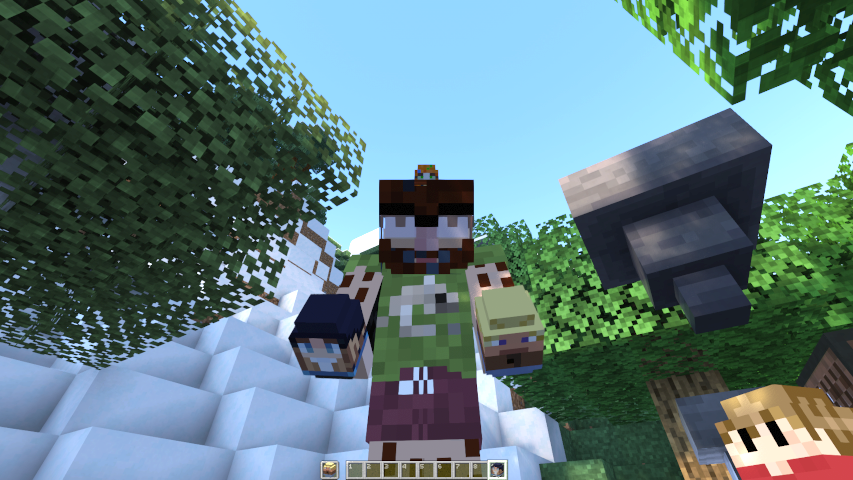